___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

***Tensorflow playground:***
https://playground.tensorflow.org/

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer["target_names"])

['malignant' 'benign']


In [7]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [9]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [10]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [11]:
df.shape

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


1    357
0    212
Name: Cancer, dtype: int64

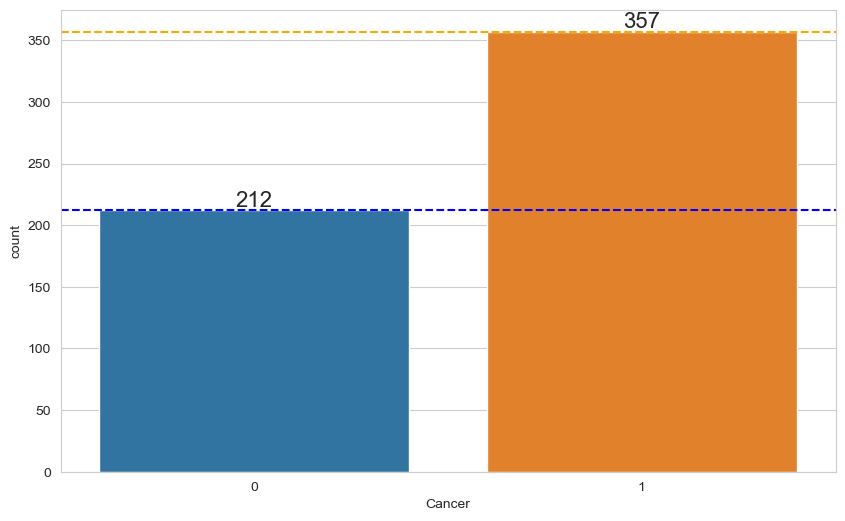

In [14]:
display(df.Cancer.value_counts())
ax = sns.countplot(x=df["Cancer"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Cancer.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Cancer.value_counts()[0], color='blue', linestyle='--');

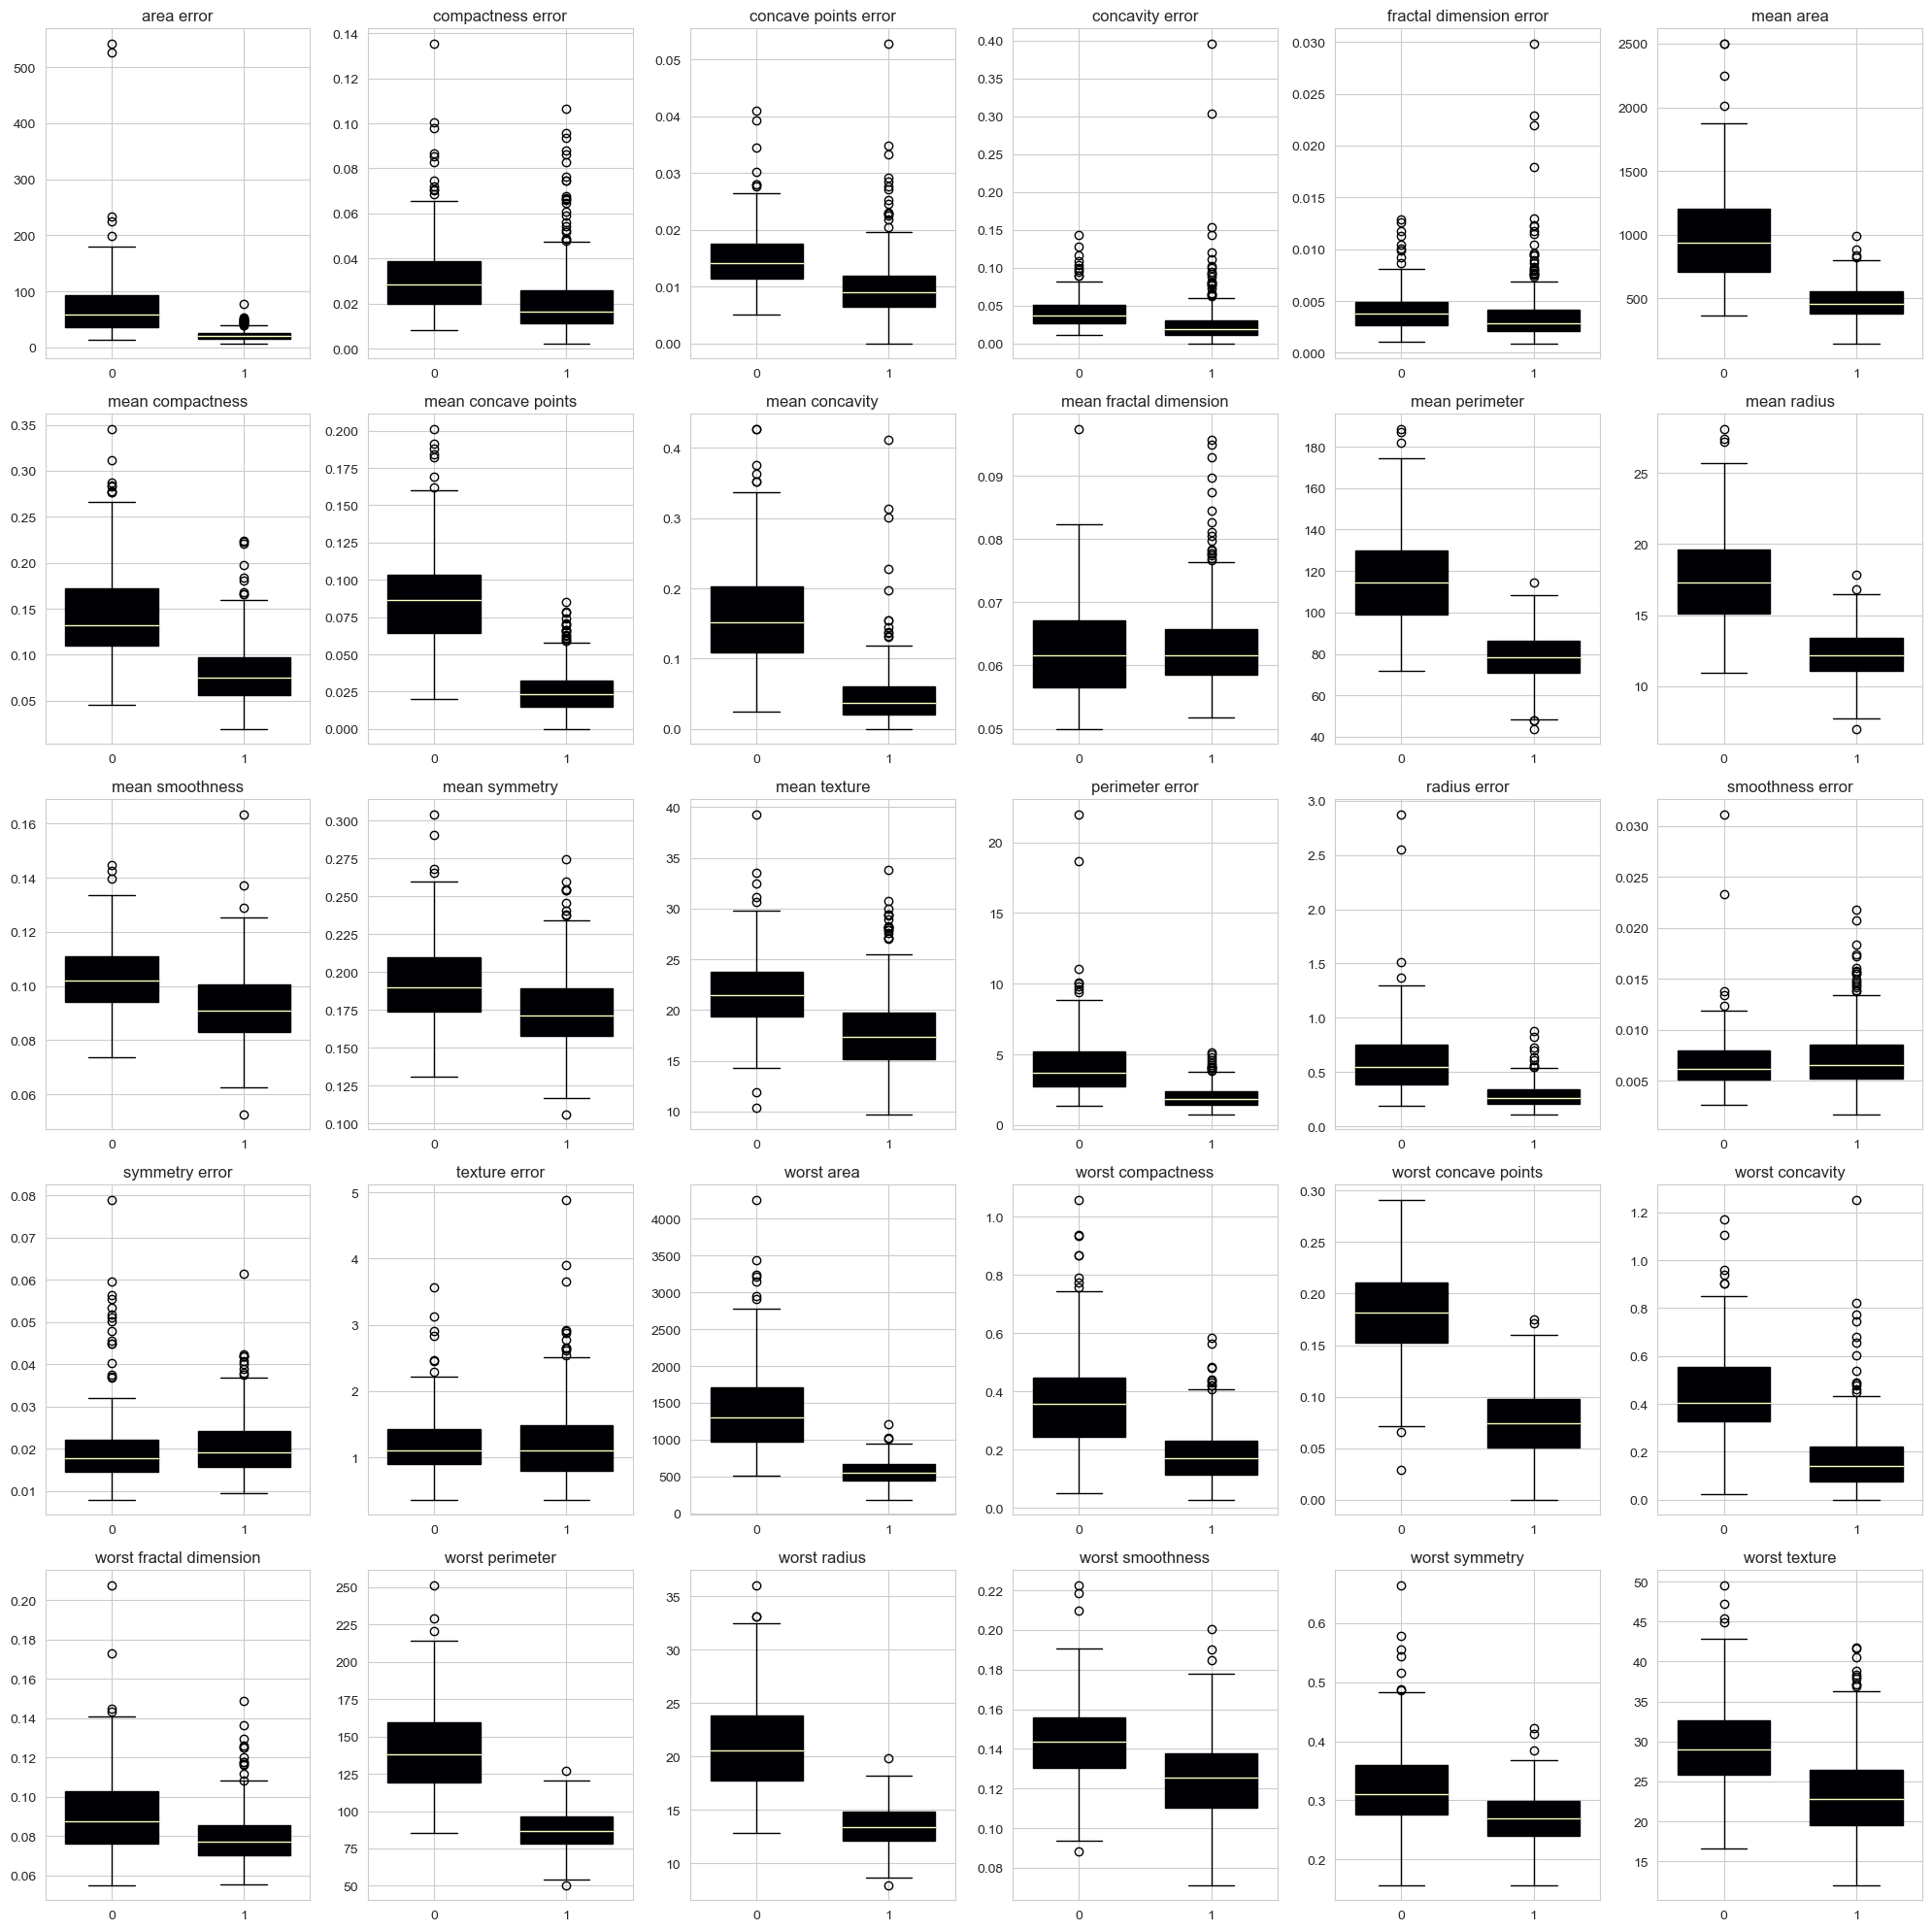

In [15]:
df.plot(kind="box",
        by="Cancer", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

# classification problemlerinde outlier tespiti yaparken class bazında bakmazsak hata yapabiliriz.

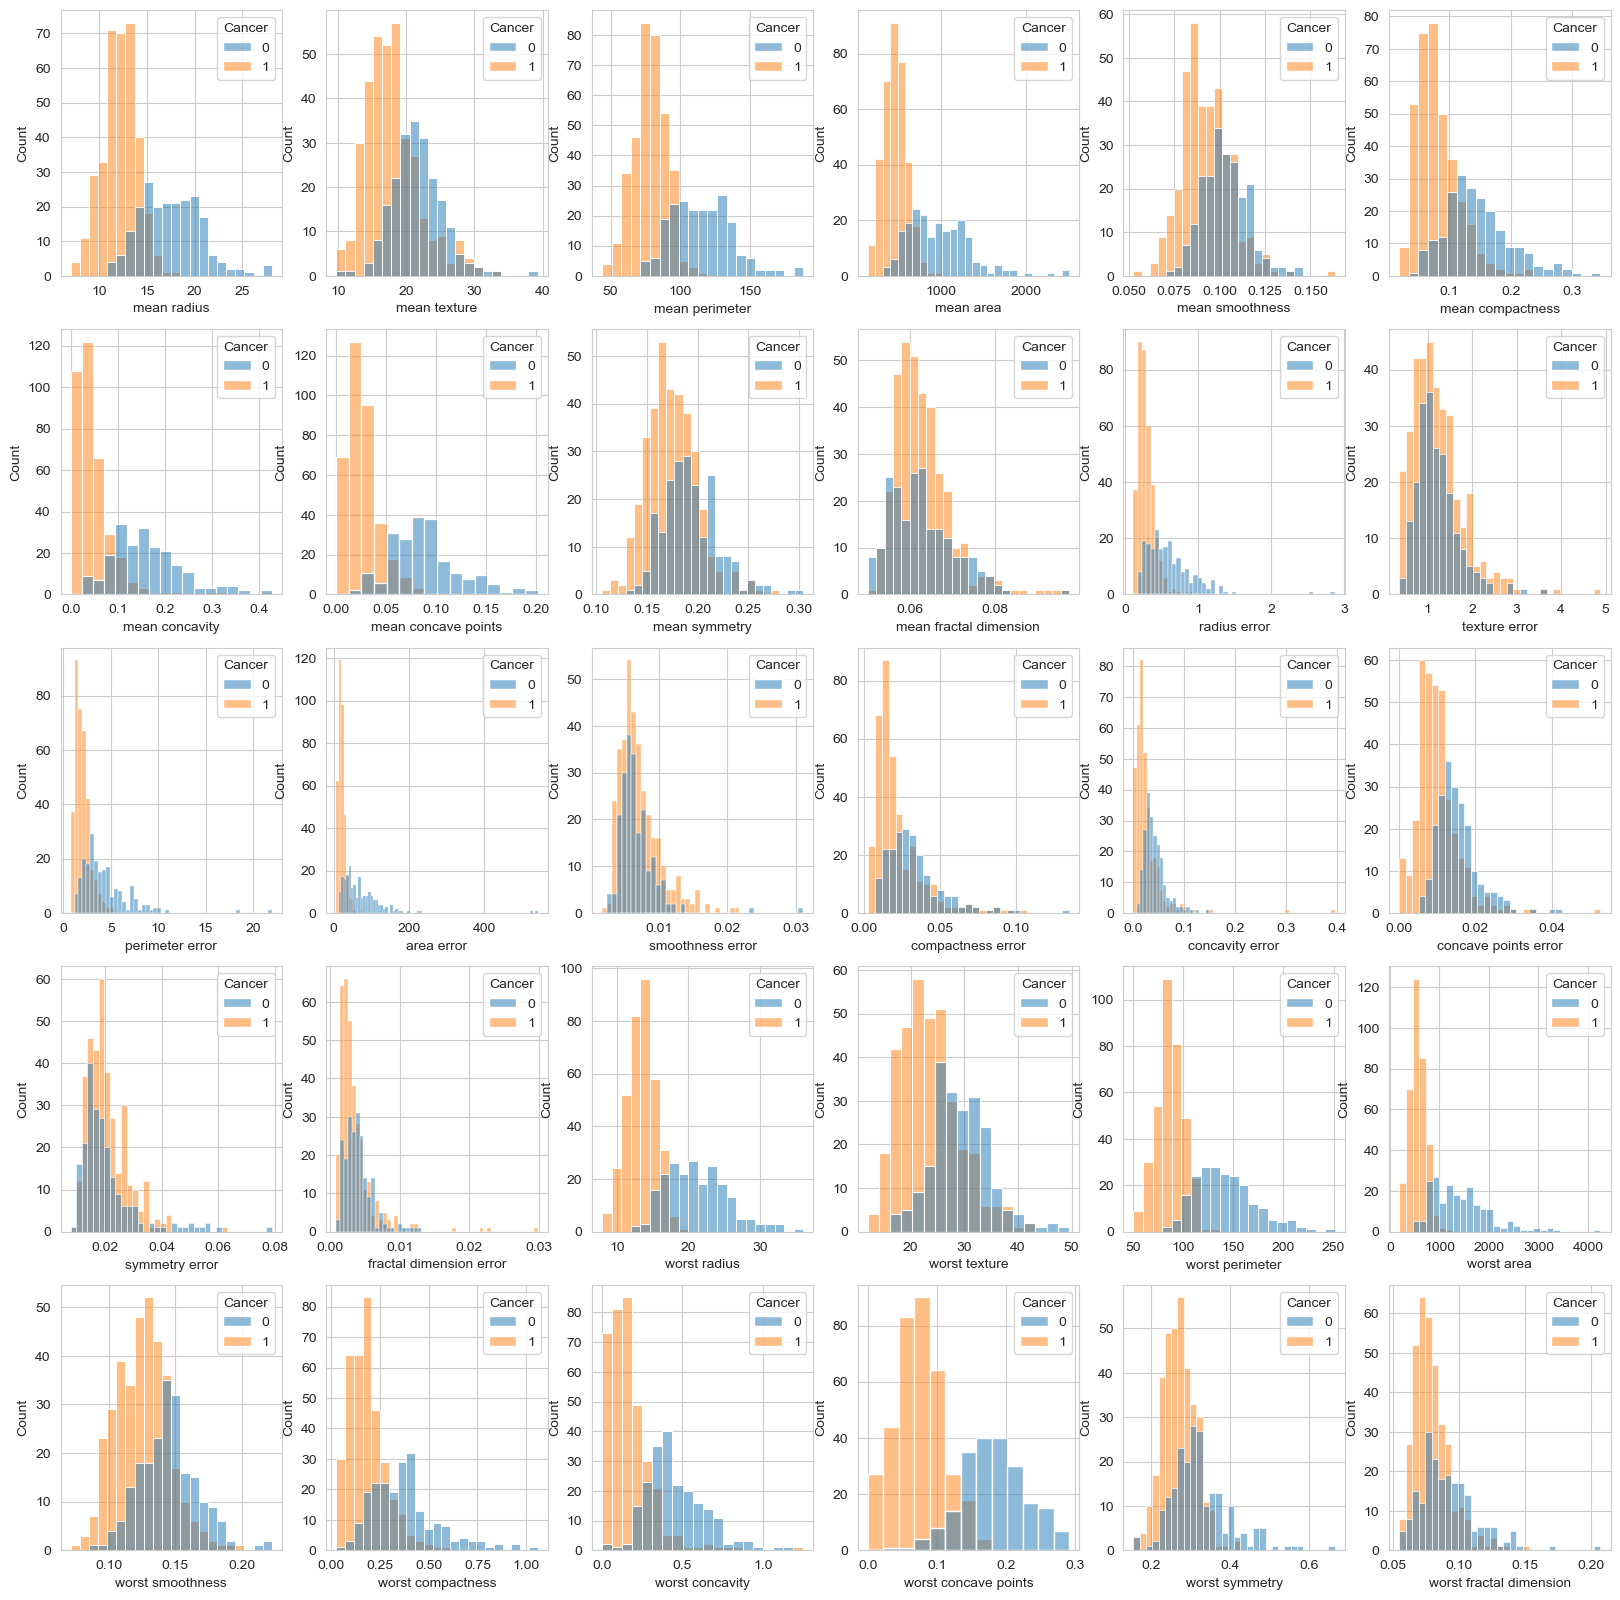

In [17]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Cancer')

In [16]:
pd.__version__  # numeric_only=True 

'1.5.3'

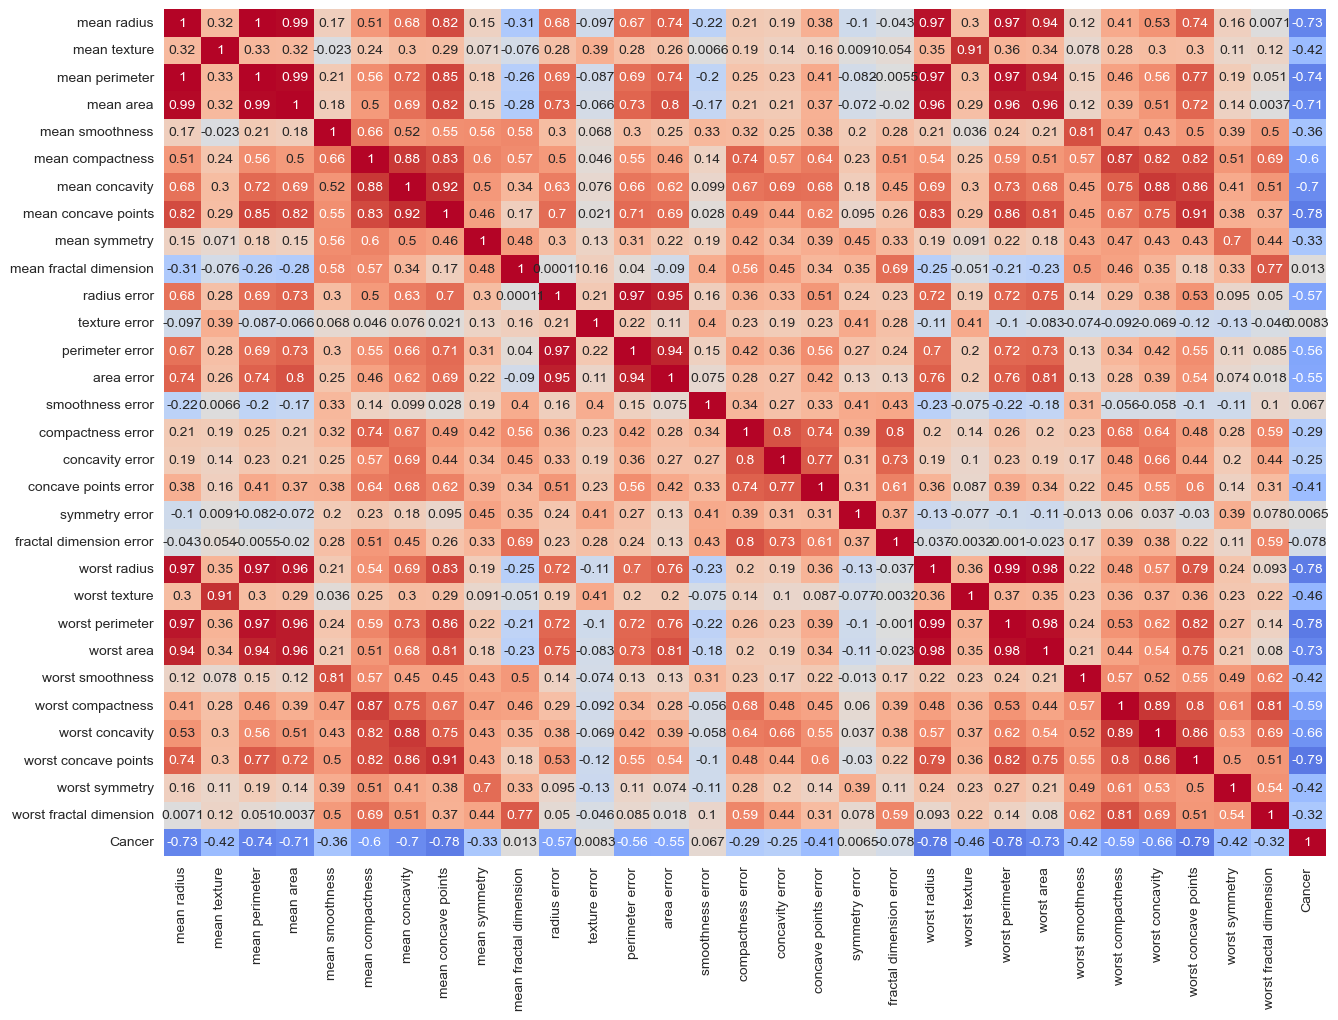

In [17]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

In [18]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]
# yüksek korelasyonlu featureları düşürüyorum modelimin hızlı çalışması için ama domain knowledge'ı olan birine ulaşabiliyorsam
# ona danışarak bu işlemi yapmalıyız.

In [19]:
df.shape

(569, 31)

In [20]:
df1 = df.drop(drop_list, axis=1).copy()

In [21]:
df1.shape

(569, 25)

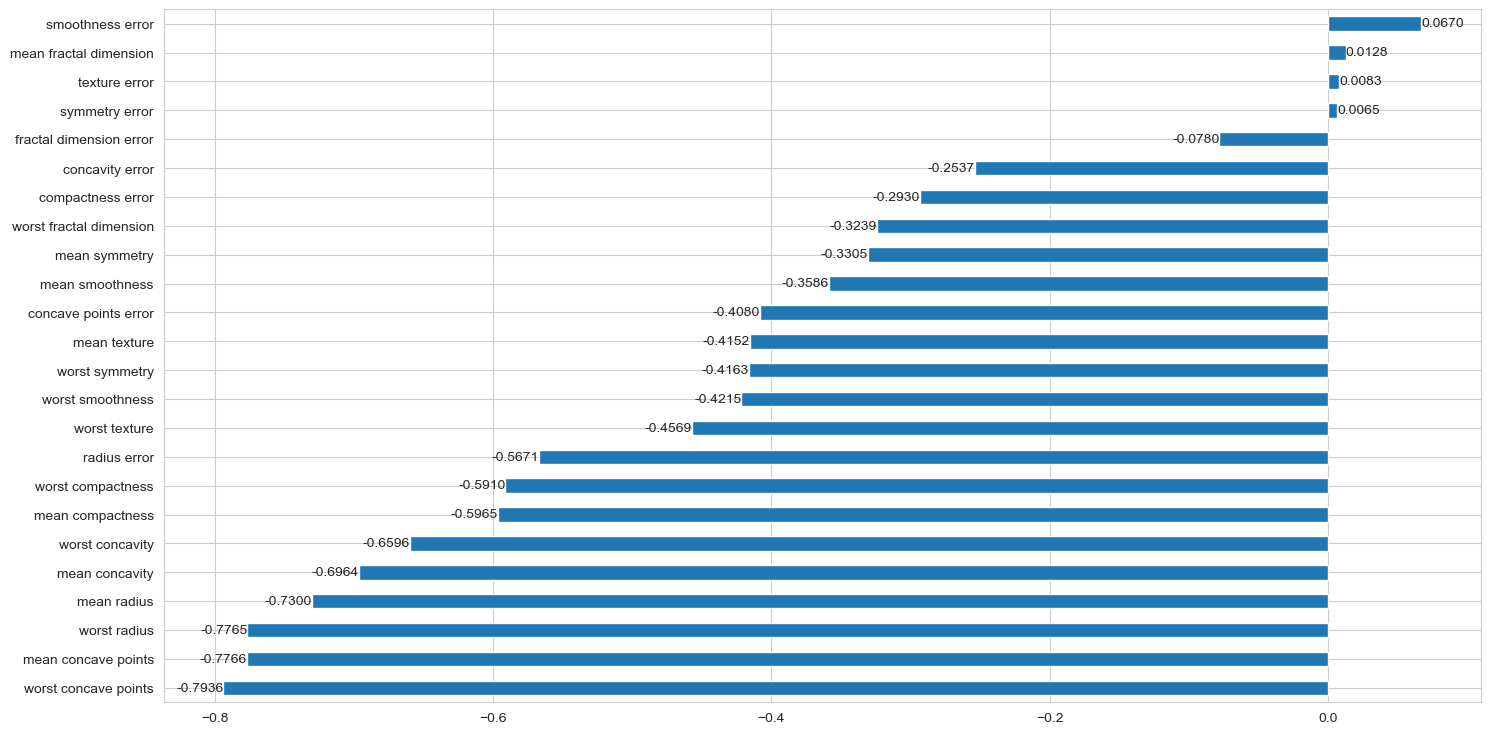

In [22]:
plt.figure(figsize=(17, 9))
ax = df1.corr()["Cancer"].sort_values().drop("Cancer").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

## Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [24]:
X = df1.drop('Cancer', axis=1)
y = df1['Cancer']

In [25]:
seed = 13

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y, random_state=seed)
#                 ...
    
#                ...
        
#                 ...
#model.fit(x = X_train, y = y_train, validation_split = 0.10, batch_size = 128, epochs = 1000)

In [31]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

In [32]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [33]:
# scaler = MinMaxScaler()
scaler = RobustScaler()
# ANN arka planda gradient descent çalıştırdığı için scaler'a ihtiyaç duyar.
## bütün scaling çeşitlerini deneyebiliriz RobustScaler() daha iyi skorlar verdiğinden onunla devam ediyorum.

In [34]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [37]:
X_train.shape

(460, 24)

In [38]:
X_val.shape

(52, 24)

In [39]:
X_test.shape

(57, 24)

In [40]:
tf.keras.utils.set_random_seed(seed)

# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.

In [41]:
# biz bütün classları %100 başarıyla tahmin edersek loss = binary_crossentropy sıfır çıkar teoride.

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(24, 36) dtype=float32, numpy=
 array([[ 4.54888642e-02, -1.13989741e-01,  3.13162595e-01,
         -1.47306368e-01, -5.35403192e-02, -2.11291865e-01,
         -2.85253823e-02, -4.61988449e-02, -3.29036117e-02,
          9.88882780e-02, -2.01522082e-01, -5.85558712e-02,
         -1.71605140e-01,  1.89421505e-01,  1.19545043e-01,
          3.06690037e-02, -6.54053092e-02,  2.04231411e-01,
          1.47658855e-01, -2.92651951e-01, -1.97620034e-01,
          1.14863724e-01, -1.54108092e-01, -2.27878138e-01,
         -2.19076276e-01,  1.13795757e-01,  3.98090482e-03,
         -1.98024377e-01,  2.51402527e-01,  2.58467585e-01,
          1.84452146e-01, -2.21124589e-01,  3.21215689e-02,
          1.86698824e-01, -3.10356796e-01,  1.02656722e-01],
        [ 8.06191862e-02, -5.95543981e-02, -2.22243905e-01,
         -2.38366127e-01, -1.81984305e-02,  2.59152025e-01,
         -2.43178934e-01, -1.30512387e-01, -1.32678241e-01,
          1.69477135e-01,  2.97

In [2]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
            callbacks = [early_stop]
    
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

model.fit(x= X_train_scaled,
                    y= y_train,
                    validation_split=.1,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    callbacks = [early_stop]
                   )

NameError: name 'ann_model' is not defined

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.653,0.654,0.609,0.788
1,0.535,0.837,0.523,0.885
2,0.409,0.900,0.445,0.904
3,0.308,0.920,0.384,0.904
4,0.230,0.930,0.341,0.942


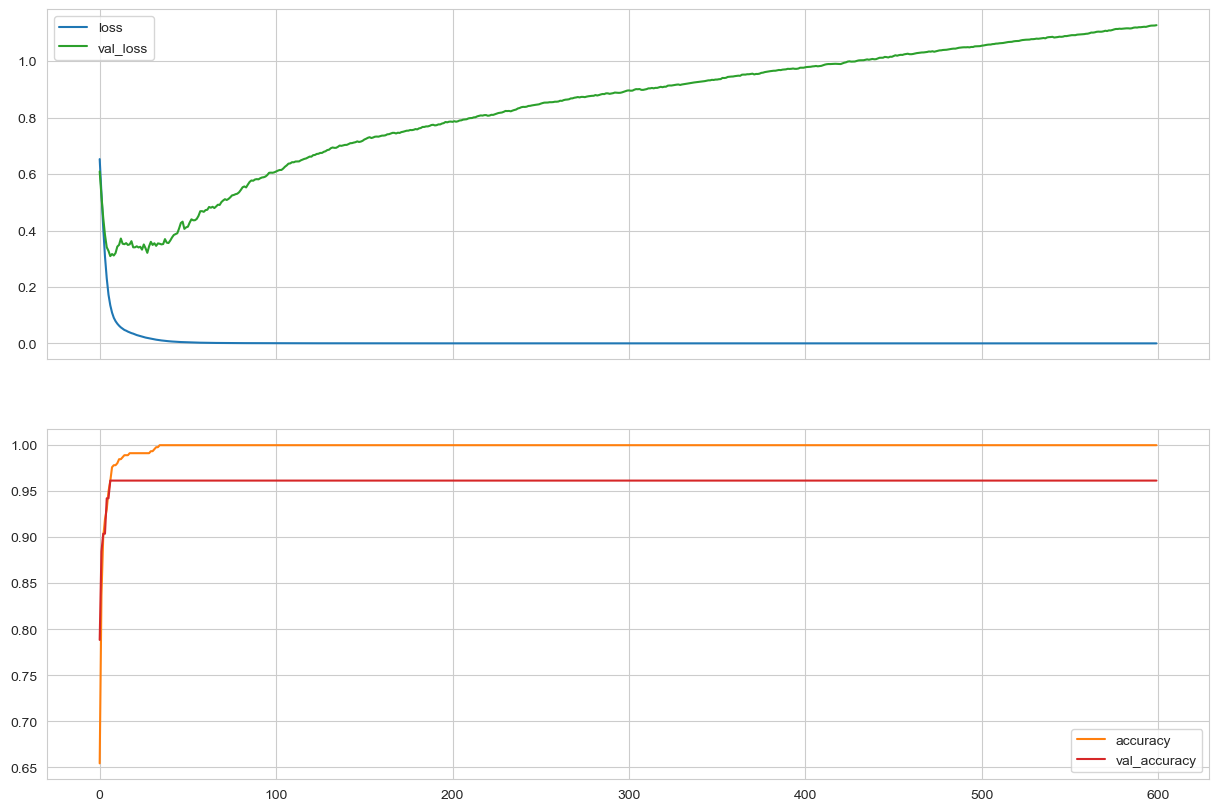

In [46]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [47]:
# modelimizin overfittinge gittiği çok ragat bir şekilde gözüküyor loss val_loss'u karşılaştırdığımızda.

In [48]:
model.evaluate(X_test, y_test, verbose=0)

[0.8894919157028198, 0.9298245906829834]

In [49]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8894919157028198
accuracy :  0.9298245906829834


In [50]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

2/2 [==============================] - 0s 10ms/step
[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [51]:
## modelimizin test datasında skorları yüksek ama grafikte de gördük modelimiz overfittinge gitmiş bizim bu modeli overfitinden 
## kurtarmamız gerekecek.Çünkü genelleme yapamıyor şu anda .

### EarlyStopping

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [54]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)



# "monitor" : Takip edilecek skoru yazıyoruz buraya mesela val_loss kullandık ,val_accuracy'de yazabilirdik
# biz val_loss'un minimum olmasını istediğimiz için mode = "min" yaptık .val_accuracy yazsaydık mode = "max" yapacaktık
# patience ise 25 epoch boyunca eğer val_loss düşmezse eğitimi durdurmasını söylüyoruz patience olarak da best pratice şu 
# olur diyebiliceğimiz bir durum yoktur .ama genelde 10-25 arası bir değer kullanılır.
#m odel eğer 25 epoch boyunca val_loss değerinde bir iyileşme görmezse eğitimi keser.
# restore_best_weights = True ise modelin eğitimi kestiği yerdeki değil de 25 epoch önceki ağırlıklar ile modeli kurmasını
# istediğimizi söylüyoruz default'u False'tur ve öyle bırakırsak eğitimi kestiği yerdeki ağırlıklar ile model eğitilmiş olur .

In [55]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)


## yukarıda tanımladığımız early stop değişkenini model.fit içerisinde callbacks hyperparametresine LİSTE içerisinde veriyoruz
# ki model early_stop kullanacağını anlasın.

Epoch 1/600
15/15 [==============================] - 2s 31ms/step - loss: 0.6530 - accuracy: 0.6543 - val_loss: 0.6092 - val_accuracy: 0.7885
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5346 - accuracy: 0.8370 - val_loss: 0.5229 - val_accuracy: 0.8846
Epoch 3/600
15/15 [==============================] - 0s 7ms/step - loss: 0.4095 - accuracy: 0.9000 - val_loss: 0.4452 - val_accuracy: 0.9038
Epoch 4/600
15/15 [==============================] - 0s 7ms/step - loss: 0.3079 - accuracy: 0.9196 - val_loss: 0.3844 - val_accuracy: 0.9038
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.9304 - val_loss: 0.3405 - val_accuracy: 0.9423
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1724 - accuracy: 0.9500 - val_loss: 0.3276 - val_accuracy: 0.9423
Epoch 7/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1351 - accuracy: 0.9609 - val_loss: 0.3092 - val_accuracy: 0.9615
Epoch 8/600


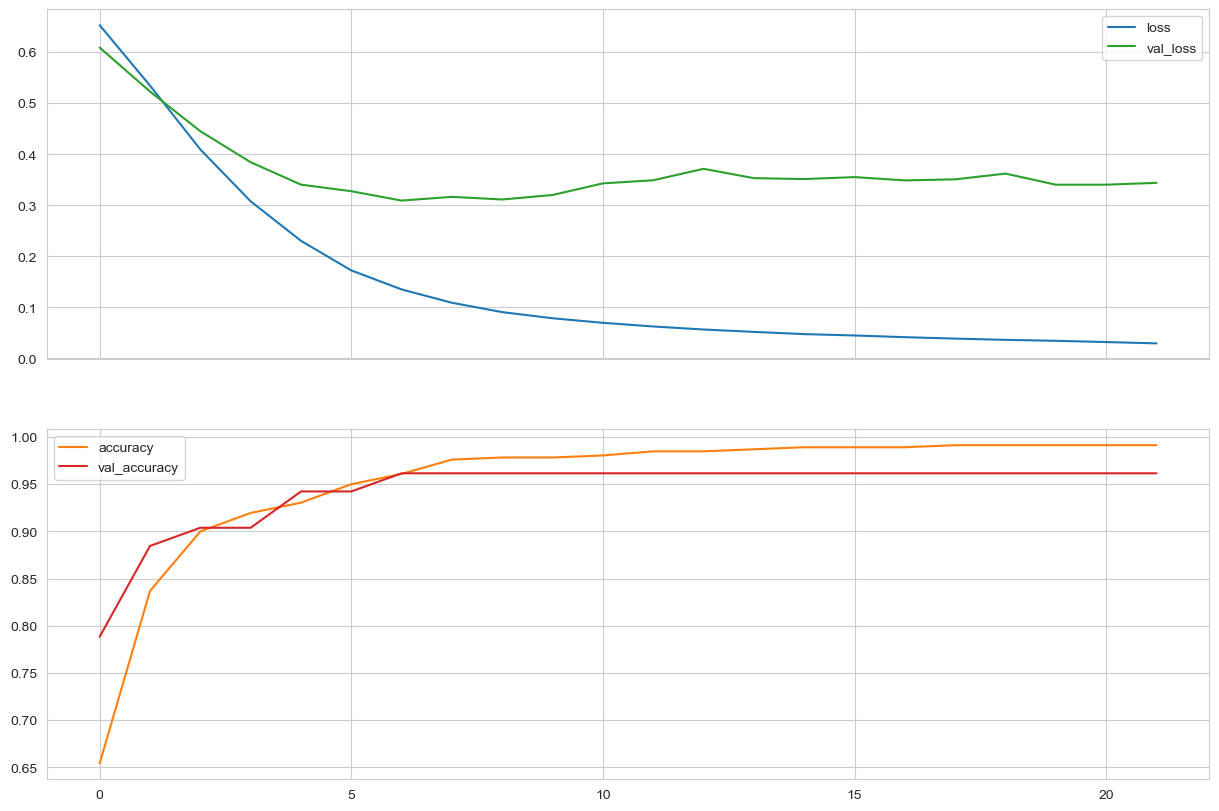

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [57]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1693921685218811
accuracy :  0.9298245906829834


In [58]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 5ms/step
[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [59]:
# model.save('model_cancer.h5')

In [60]:
## ----> hata sayısı ve skorlar aynı olabilir ama şu anda elimde daha güvenilir bir model var overfittingten kurtardık.

### learning_rate

In [61]:
from tensorflow.keras.optimizers import Adam
## biz eğer bir optimizer'ın default learnig rate'ini değiştirmek istiyorsak tensorflow.keras.optimizers'dan
## hangi optimizerın learning rate'ini değiştireceksek önce onu import ediyoruz.

In [62]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :



model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [63]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [64]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
15/15 [==============================] - 3s 28ms/step - loss: 0.4707 - accuracy: 0.8130 - val_loss: 0.3721 - val_accuracy: 0.9231
Epoch 2/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1578 - accuracy: 0.9435 - val_loss: 0.3218 - val_accuracy: 0.9615
Epoch 3/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0781 - accuracy: 0.9696 - val_loss: 0.4467 - val_accuracy: 0.9423
Epoch 4/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 0.9739 - val_loss: 0.4869 - val_accuracy: 0.9615
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9848 - val_loss: 0.4555 - val_accuracy: 0.9615
Epoch 6/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.3517 - val_accuracy: 0.9615
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.3365 - val_accuracy: 0.9615
Epoch 8/600


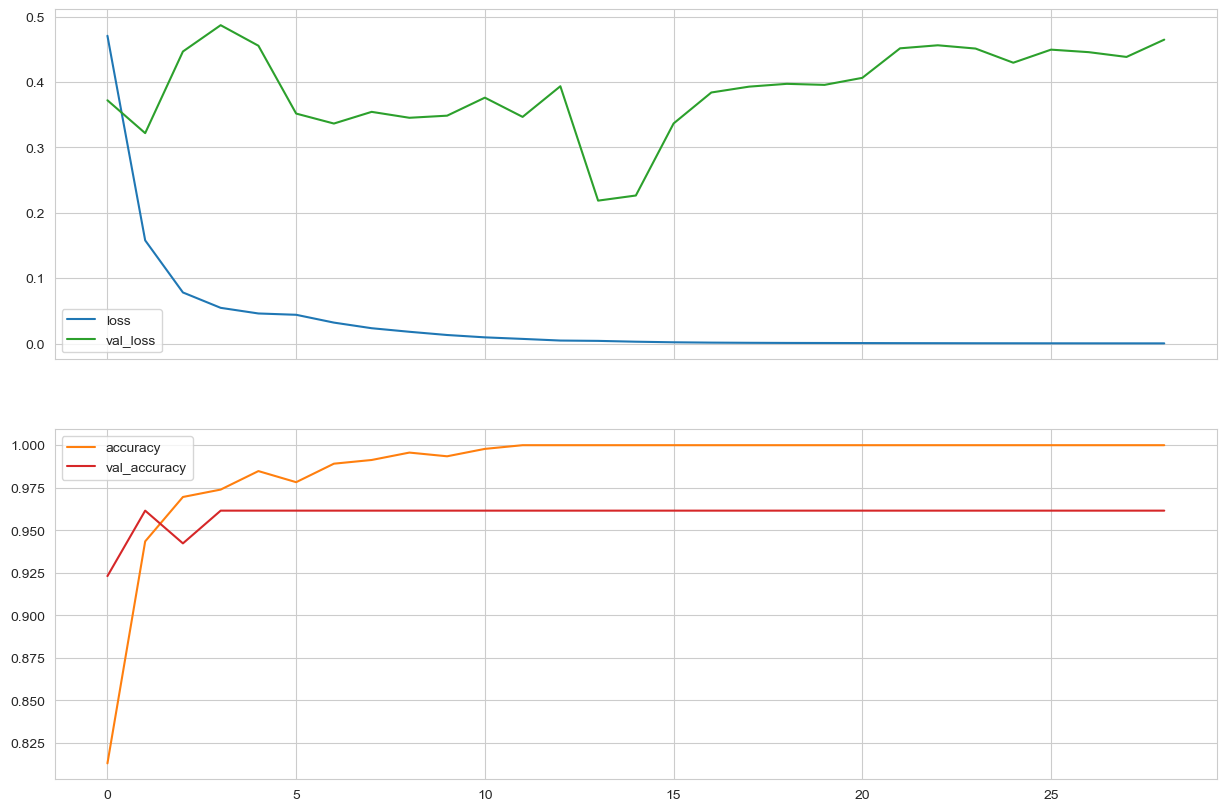

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [66]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.39992308616638184
accuracy :  0.9122806787490845


In [67]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 6ms/step
[[19  2]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.94      0.92      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [68]:
## daha kötü bir lokal minimuma girdi ve overfittinge meyilli.

### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [69]:
from tensorflow.keras.layers import Dropout

# ---> Dropout'ta bir regularization tekniğidir.
# Dropout, ağın belirli bir kısmını her İTERASYONDA rastgele seçerek "eğitim" sırasında devre dışı bırakır.Yukarıda şekilde 
# görüleceği gibi. biz modelimizin datayı ezberlemesini engellemek isteriz datadaki kuralları öğrenmesini datanın yapısını 
# anlamasını isteriz ama model datayı takıntı haline getirirse yani ezberlerse bu dropout yöntemi de kullanabileceğimiz bir 
# regularization tekniğidir.


# Dropout'u bir layer gibi modelimize ekleyeceğiz aşağıdaki örnekte olduğu gibi. 
# model.add(Dropout(0.2)) demek her iterasyonda nöronların MAX  %20 'si kapanacak demektir ve bu her iterasyonda RASTGELE olur

In [70]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [71]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
15/15 [==============================] - 2s 31ms/step - loss: 0.7858 - accuracy: 0.5783 - val_loss: 0.6527 - val_accuracy: 0.7500
Epoch 2/600
15/15 [==============================] - 0s 7ms/step - loss: 0.7293 - accuracy: 0.6109 - val_loss: 0.6333 - val_accuracy: 0.7885
Epoch 3/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6735 - accuracy: 0.6543 - val_loss: 0.6178 - val_accuracy: 0.8077
Epoch 4/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6698 - accuracy: 0.6652 - val_loss: 0.6001 - val_accuracy: 0.8846
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6045 - accuracy: 0.7043 - val_loss: 0.5735 - val_accuracy: 0.8846
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5957 - accuracy: 0.6739 - val_loss: 0.5454 - val_accuracy: 0.9231
Epoch 7/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5316 - accuracy: 0.7087 - val_loss: 0.5143 - val_accuracy: 0.9038
Epoch 8/600


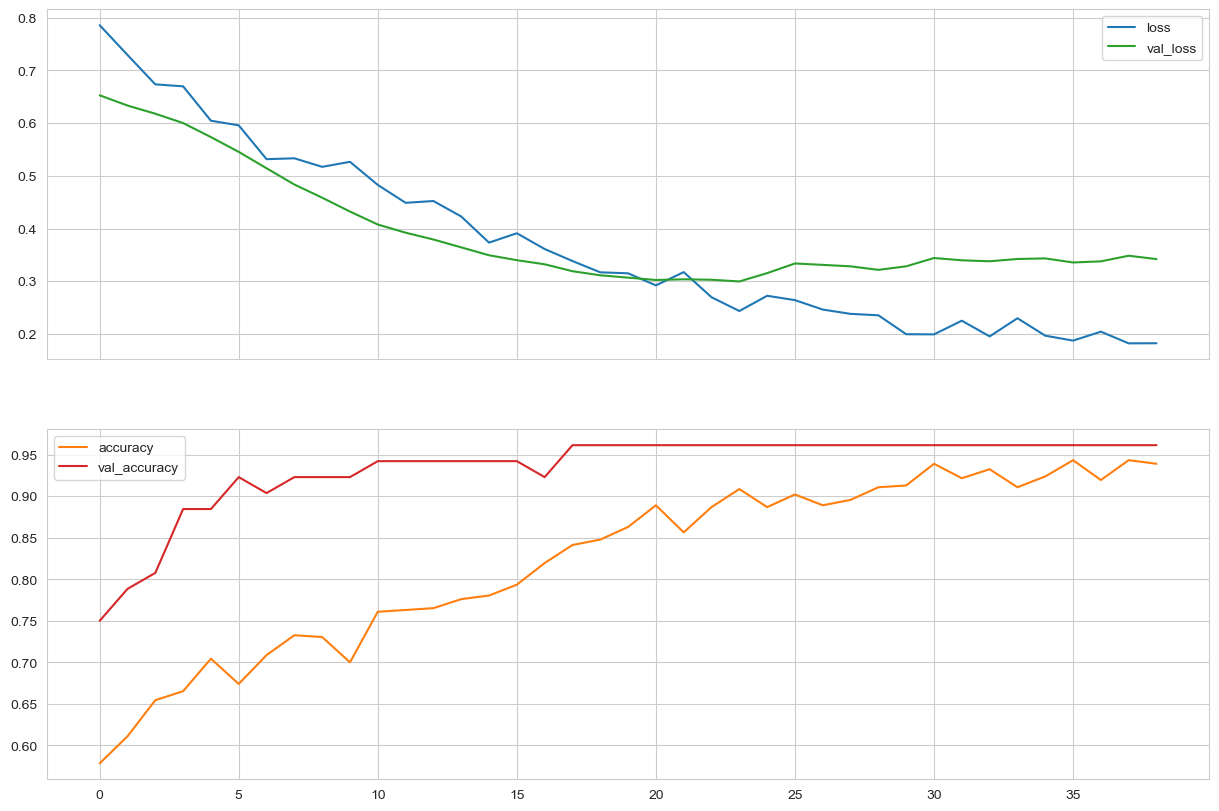

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1424497365951538
accuracy :  0.9473684430122375


In [74]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [75]:
# ----> dropout ile de overfittingi giderebildik.
# ! Hem dropout hem earlystop aynı anda kullanılabilir.

# L1 and L2 Regularizations(Weight Decay)

***Why should we use kernel_regularizer?***

- Kernel_regularizer is a technique that reduces the amount of weight of a network by allocating large weights to smaller ones. When kernel_regularizer is applied, the weights become smaller and the network is less likely to overfit.

Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.

Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.

***These layers expose 3 keyword arguments:***

- kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
- bias_regularizer: Regularizer to apply a penalty on the layer's bias
- activity_regularizer: Regularizer to apply a penalty on the layer's output

In [76]:
from tensorflow.keras.regularizers import l1, l2, L1L2

## deep learningte kernel'e yani weightlere , aktivasyon fonksiyonlarına ve bias'lere doğrudan penalty eklenebilir.

In [77]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3),
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5), 
                input_dim=X_train.shape[1]))

model.add(Dense(18, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))

model.add(Dense(9, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))


model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [78]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          callbacks=[early_stop],
          verbose=1
)

Epoch 1/600
15/15 [==============================] - 3s 39ms/step - loss: 0.9867 - accuracy: 0.6500 - val_loss: 0.9405 - val_accuracy: 0.7885
Epoch 2/600
15/15 [==============================] - 0s 7ms/step - loss: 0.8661 - accuracy: 0.8370 - val_loss: 0.8530 - val_accuracy: 0.8846
Epoch 3/600
15/15 [==============================] - 0s 7ms/step - loss: 0.7404 - accuracy: 0.9022 - val_loss: 0.7720 - val_accuracy: 0.9038
Epoch 4/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6374 - accuracy: 0.9174 - val_loss: 0.7053 - val_accuracy: 0.9038
Epoch 5/600
15/15 [==============================] - 0s 8ms/step - loss: 0.5569 - accuracy: 0.9304 - val_loss: 0.6614 - val_accuracy: 0.9423
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.4951 - accuracy: 0.9500 - val_loss: 0.6405 - val_accuracy: 0.9423
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4533 - accuracy: 0.9630 - val_loss: 0.6096 - val_accuracy: 0.9615
Epoch 8/600


Epoch 59/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1398 - accuracy: 0.9913 - val_loss: 0.2678 - val_accuracy: 0.9615
Epoch 60/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1392 - accuracy: 0.9935 - val_loss: 0.2545 - val_accuracy: 0.9615
Epoch 61/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1377 - accuracy: 0.9935 - val_loss: 0.2479 - val_accuracy: 0.9615
Epoch 62/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1353 - accuracy: 0.9913 - val_loss: 0.2512 - val_accuracy: 0.9615
Epoch 63/600
15/15 [==============================] - 0s 8ms/step - loss: 0.1349 - accuracy: 0.9935 - val_loss: 0.2445 - val_accuracy: 0.9615
Epoch 64/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1326 - accuracy: 0.9913 - val_loss: 0.2326 - val_accuracy: 0.9615
Epoch 65/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1325 - accuracy: 0.9935 - val_loss: 0.2385 - val_accuracy: 0.9808
Epoch 

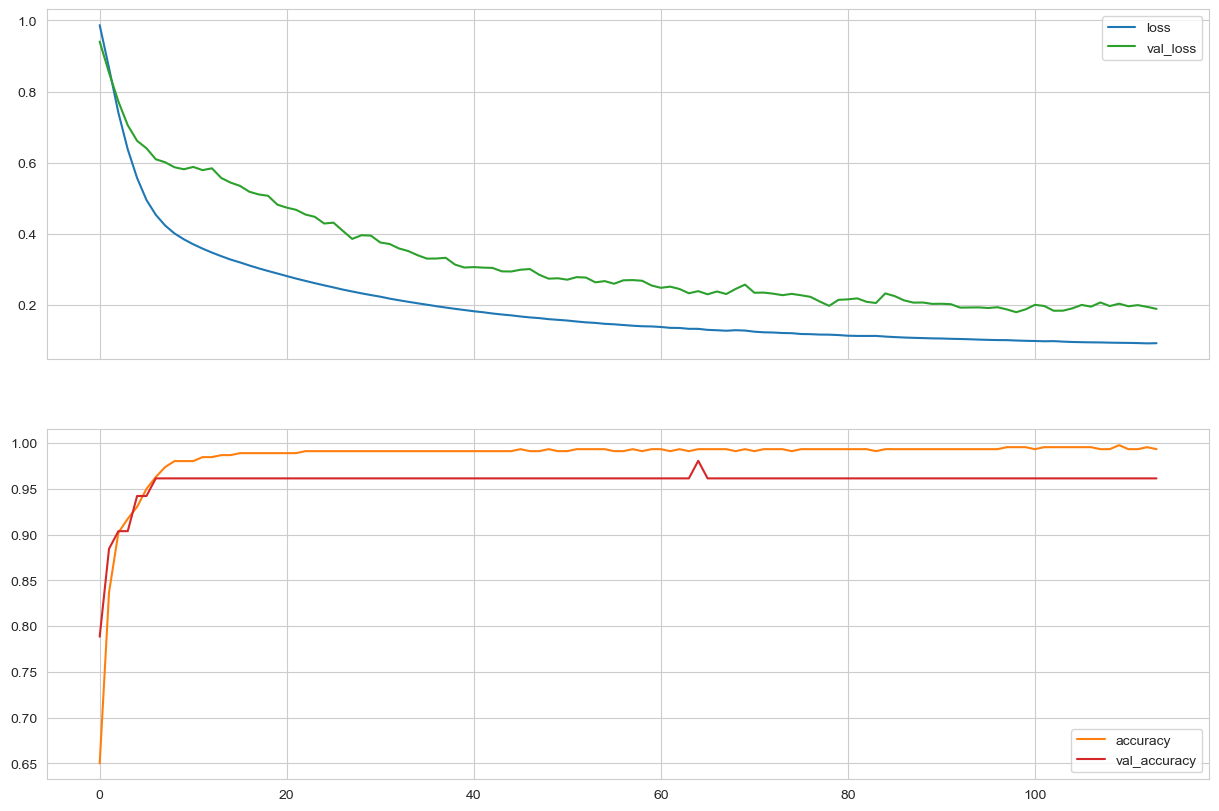

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"], ["accuracy","val_accuracy"]], layout=(2,1), figsize=(15,10))
plt.show()

In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.2027895450592041
accuracy:  0.9649122953414917


In [81]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 10ms/step
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [82]:
## skorlar daha da iyileşti overfittingte yok şimdiye kadar ki en iyi model bu.

2/2 [==============================] - 0s 7ms/step


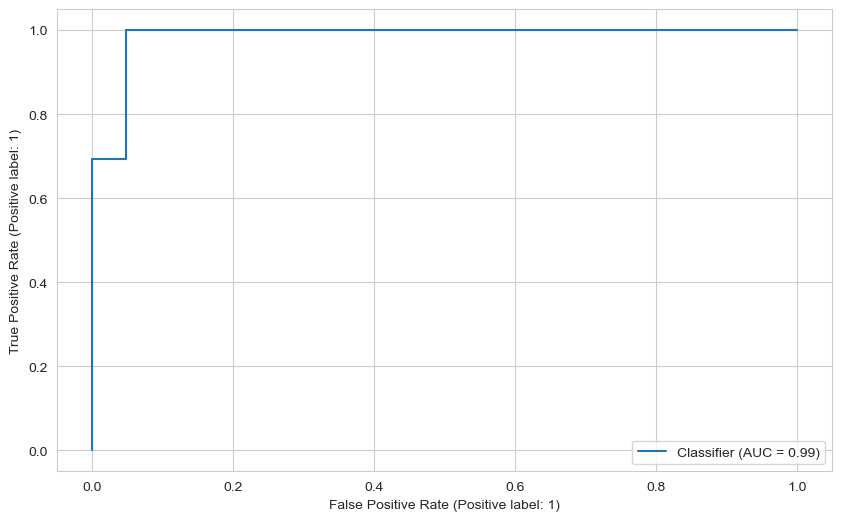

In [83]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [84]:
roc_auc_score(y_test, y_pred_proba)

0.9854497354497354

In [85]:
model.save("l1l2_model.h5")

## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [86]:
from sklearn.model_selection import cross_validate
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


## cross_validate sklearnde olan bir uygulama biz doğrudan cross_validate'in içerisine ann ile kurduğumuz modeli verirsek hata
#alırız bunun için tensorflow.keras.wrappers.scikit_learn import KerasClassifier ile modelimizin üzerine adeta bir scikit_learn
# ambalajı geçirerek cross_validation yapabilme imkanı elde ediyoruz.

In [87]:
def build_classifier():
    tf.keras.utils.set_random_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [88]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

# classifier_model'i sklearndeki bir classifaciton algoritması olarak kullanabiliriz artık !

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

# 

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

2/2 [==============================] - 0s 0s/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.957,0.970,0.970,0.970
2,0.978,0.967,1.000,0.983
3,0.978,1.000,0.963,0.981
4,0.978,0.967,1.000,0.983
5,0.978,0.962,1.000,0.980
6,1.000,1.000,1.000,1.000
7,0.957,0.957,0.957,0.957
8,0.978,0.969,1.000,0.984
9,0.978,0.967,1.000,0.983
10,1.000,1.000,1.000,1.000


In [90]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.978,0.014
pre,0.976,0.017
rec,0.989,0.018
f1,0.982,0.013


In [91]:
## ----> cv teorik olarak uygulanabilen ama pratikte uygulanmayan bir durumdur ; modelimizi her kurduğumuzda farklı ağırlıklarla
## başlar çünkü bu cv'ının mantığına aykırı bir durumdur burada 10 farklı model deniyoruz! 

## Hyperparameter Optimization

https://optuna.org

In [92]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [105]:
#!pip install optuna

     ------------------------------------ 365.7/365.7 kB 668.1 kB/s eta 0:00:00
     ------------------------------------- 212.9/212.9 kB 65.2 kB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 1.5 MB/s eta 0:00:00


In [107]:
import optuna

## GridSearch'i de aynı cv'da olduğu gibi kullanabilriz burada ama optunayı kullanacağız bunun nedenleri
## ---> sklearn GPU'yu kullanamaz , gridsearch verdiğimiz uzaydaki bütün kombinasyonları deniyor DL'de çok fazla hyperparametre
# var bunun için GPU'yu kullanabileceğimiz bir optimization yöntemi olan optuna'yı kullanıyoruz.

# optunayı Ml algoritmalarında da kullanabilirsiniz.

In [108]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [109]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [110]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-15 22:39:08,119] A new study created in memory with name: no-name-1c3e89fe-f46c-4505-80e1-7d007230f0f7


Restoring model weights from the end of the best epoch: 178.
Epoch 193: early stopping


[I 2023-05-15 22:39:31,769] Trial 0 finished with value: 0.9298245906829834 and parameters: {'n_units1': 65, 'n_units2': 55, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0010947871237059663, 'regularizer1': 0.00014801171631446047, 'regularizer2': 1.587215794630414e-05, 'dropout': 0, 'w0': 1.0638613731945306, 'w1': 0.010266365305630973}. Best is trial 0 with value: 0.9298245906829834.


Restoring model weights from the end of the best epoch: 496.
Epoch 511: early stopping


[I 2023-05-15 22:40:22,246] Trial 1 finished with value: 0.9824561476707458 and parameters: {'n_units1': 86, 'n_units2': 48, 'n_units3': 54, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00011985987791428293, 'regularizer1': 0.00025872103071259507, 'regularizer2': 3.4349046176504805e-05, 'dropout': 0.3, 'w0': 0.0905535706401114, 'w1': 0.2728964210228545}. Best is trial 1 with value: 0.9824561476707458.
[I 2023-05-15 22:41:27,854] Trial 2 finished with value: 0.6842105388641357 and parameters: {'n_units1': 111, 'n_units2': 41, 'n_units3': 53, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0006276771264891911, 'regularizer1': 0.0002036080922459568, 'regularizer2': 0.0007078582275199609, 'dropout': 0, 'w0': 0.10488409781709368, 'w1': 0.3079528658296033}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 128.
Epoch 143: early stopping


[I 2023-05-15 22:41:52,824] Trial 3 finished with value: 0.9298245906829834 and parameters: {'n_units1': 96, 'n_units2': 64, 'n_units3': 44, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 7.342605192690781e-05, 'regularizer1': 0.0005540284513654055, 'regularizer2': 3.7061130669509734e-05, 'dropout': 0, 'w0': 4.571483585363798, 'w1': 1.8976141851546993}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-05-15 22:41:58,554] Trial 4 finished with value: 0.8245614171028137 and parameters: {'n_units1': 110, 'n_units2': 25, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.007266696835545815, 'regularizer1': 4.0959551185989176e-05, 'regularizer2': 0.0004041658355225423, 'dropout': 0.3, 'w0': 1.786266507500871, 'w1': 0.010796948903315208}. Best is trial 1 with value: 0.9824561476707458.
[I 2023-05-15 22:43:09,764] Trial 5 finished with value: 0.2982456088066101 and parameters: {'n_units1': 102, 'n_units2': 52, 'n_units3': 57, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 4.0313717901435413e-05, 'regularizer1': 9.286244713834884e-05, 'regularizer2': 3.251136707641135e-05, 'dropout': 0.3, 'w0': 0.03920885025940532, 'w1': 0.3299423519466615}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 233.
Epoch 248: early stopping


[I 2023-05-15 22:43:38,616] Trial 6 finished with value: 0.8947368264198303 and parameters: {'n_units1': 117, 'n_units2': 38, 'n_units3': 47, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005043776585398824, 'regularizer1': 3.9117827329896863e-05, 'regularizer2': 0.0004287530048790209, 'dropout': 0.5, 'w0': 0.20268913085066673, 'w1': 0.020380766843878403}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 48.
Epoch 63: early stopping


[I 2023-05-15 22:43:47,514] Trial 7 finished with value: 0.9824561476707458 and parameters: {'n_units1': 102, 'n_units2': 35, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.004350609214564618, 'regularizer1': 0.0007120163502026415, 'regularizer2': 1.5825926088690473e-05, 'dropout': 0, 'w0': 0.4521148682683228, 'w1': 1.357602468388736}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-05-15 22:43:53,004] Trial 8 finished with value: 0.9649122953414917 and parameters: {'n_units1': 65, 'n_units2': 61, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02155680440710052, 'regularizer1': 1.4960540849497098e-05, 'regularizer2': 8.962414097671426e-05, 'dropout': 0.3, 'w0': 1.234054769203952, 'w1': 1.6507876880664847}. Best is trial 1 with value: 0.9824561476707458.
[I 2023-05-15 22:45:03,173] Trial 9 finished with value: 0.6842105388641357 and parameters: {'n_units1': 123, 'n_units2': 18, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002874758178375483, 'regularizer1': 1.7367891280261344e-05, 'regularizer2': 3.647592090581842e-05, 'dropout': 0.5, 'w0': 0.02830845122968946, 'w1': 0.051555585678639215}. Best is trial 1 with value: 0.9824561476707458.
[I 2023-05-15 22:46:12,353] Trial 10 finished with value: 0.6315789222717285 and parameters: {'n_units1': 80, 'n_units2': 47, 'n_u

Restoring model weights from the end of the best epoch: 15.
Epoch 30: early stopping


[I 2023-05-15 22:46:18,947] Trial 11 finished with value: 0.9649122953414917 and parameters: {'n_units1': 88, 'n_units2': 34, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.098100149907835, 'regularizer1': 0.0009404952541773743, 'regularizer2': 1.2922091855961022e-05, 'dropout': 0, 'w0': 0.4055131271381715, 'w1': 0.6296638966608201}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 353.
Epoch 368: early stopping


[I 2023-05-15 22:46:56,264] Trial 12 finished with value: 0.9824561476707458 and parameters: {'n_units1': 84, 'n_units2': 30, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00017196566346491514, 'regularizer1': 0.0009552784967584992, 'regularizer2': 1.016906476589621e-05, 'dropout': 0, 'w0': 0.27815125940506247, 'w1': 0.7837287364488512}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 290.
Epoch 305: early stopping


[I 2023-05-15 22:47:29,419] Trial 13 finished with value: 0.9649122953414917 and parameters: {'n_units1': 98, 'n_units2': 44, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.000219746914279967, 'regularizer1': 0.0003581977601668266, 'regularizer2': 2.1781720522995174e-05, 'dropout': 0.3, 'w0': 0.09572484630998673, 'w1': 0.1981812363293031}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 79.
Epoch 94: early stopping


[I 2023-05-15 22:47:42,244] Trial 14 finished with value: 0.9473684430122375 and parameters: {'n_units1': 74, 'n_units2': 50, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002770494002868482, 'regularizer1': 0.0004492449683606182, 'regularizer2': 2.228278067315601e-05, 'dropout': 0.5, 'w0': 0.5812031840158274, 'w1': 0.7367543223687978}. Best is trial 1 with value: 0.9824561476707458.


{'n_units1': 86,
 'n_units2': 48,
 'n_units3': 54,
 'optimizer': keras.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.00011985987791428293,
 'regularizer1': 0.00025872103071259507,
 'regularizer2': 3.4349046176504805e-05,
 'dropout': 0.3,
 'w0': 0.0905535706401114,
 'w1': 0.2728964210228545}

In [111]:
## her çalıştırdığımızda farklı şeyler deneyecek ; seed olsa da(başlangıçta aynı yerden başlasa da )
# kendisi farklı şeyler deneyerek  devam ediyor.

In [112]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 3s 88ms/step - loss: 0.9797 - Accuracy: 0.4848 - val_loss: 0.9583 - val_Accuracy: 0.4423
Epoch 2/500
8/8 [==============================] - 0s 13ms/step - loss: 0.9413 - Accuracy: 0.5761 - val_loss: 0.9482 - val_Accuracy: 0.5192
Epoch 3/500
8/8 [==============================] - 0s 14ms/step - loss: 0.9319 - Accuracy: 0.5957 - val_loss: 0.9370 - val_Accuracy: 0.5385
Epoch 4/500
8/8 [==============================] - 0s 14ms/step - loss: 0.9222 - Accuracy: 0.5978 - val_loss: 0.9263 - val_Accuracy: 0.5962
Epoch 5/500
8/8 [==============================] - 0s 13ms/step - loss: 0.9058 - Accuracy: 0.6565 - val_loss: 0.9153 - val_Accuracy: 0.6538
Epoch 6/500
8/8 [==============================] - 0s 13ms/step - loss: 0.8975 - Accuracy: 0.6587 - val_loss: 0.9059 - val_Accuracy: 0.6923
Epoch 7/500
8/8 [==============================] - 0s 13ms/step - loss: 0.8803 - Accuracy: 0.7087 - val_loss: 0.8946 - val_Accuracy: 0.7692
Epoch 8/500
8/8 [===

8/8 [==============================] - 0s 14ms/step - loss: 0.3366 - Accuracy: 0.9696 - val_loss: 0.3607 - val_Accuracy: 0.9615
Epoch 118/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3115 - Accuracy: 0.9804 - val_loss: 0.3587 - val_Accuracy: 0.9615
Epoch 119/500
8/8 [==============================] - 0s 12ms/step - loss: 0.3111 - Accuracy: 0.9761 - val_loss: 0.3564 - val_Accuracy: 0.9615
Epoch 120/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3152 - Accuracy: 0.9739 - val_loss: 0.3549 - val_Accuracy: 0.9615
Epoch 121/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3259 - Accuracy: 0.9717 - val_loss: 0.3553 - val_Accuracy: 0.9615
Epoch 122/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3151 - Accuracy: 0.9761 - val_loss: 0.3550 - val_Accuracy: 0.9615
Epoch 123/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3062 - Accuracy: 0.9739 - val_loss: 0.3547 - val_Accuracy: 0.9615
Epoch 124/500
8/8 [=

Epoch 175/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2781 - Accuracy: 0.9783 - val_loss: 0.3099 - val_Accuracy: 0.9615
Epoch 176/500
8/8 [==============================] - 0s 12ms/step - loss: 0.2779 - Accuracy: 0.9804 - val_loss: 0.3104 - val_Accuracy: 0.9615
Epoch 177/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2626 - Accuracy: 0.9870 - val_loss: 0.3098 - val_Accuracy: 0.9615
Epoch 178/500
8/8 [==============================] - 0s 14ms/step - loss: 0.2749 - Accuracy: 0.9848 - val_loss: 0.3047 - val_Accuracy: 0.9615
Epoch 179/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2736 - Accuracy: 0.9783 - val_loss: 0.3018 - val_Accuracy: 0.9615
Epoch 180/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2629 - Accuracy: 0.9870 - val_loss: 0.3003 - val_Accuracy: 0.9615
Epoch 181/500
8/8 [==============================] - 0s 14ms/step - loss: 0.2695 - Accuracy: 0.9826 - val_loss: 0.3003 - val_Accuracy: 0.9615
Epoch 

Epoch 233/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2374 - Accuracy: 0.9870 - val_loss: 0.2773 - val_Accuracy: 0.9615
Epoch 234/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2389 - Accuracy: 0.9804 - val_loss: 0.2781 - val_Accuracy: 0.9615
Epoch 235/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2387 - Accuracy: 0.9870 - val_loss: 0.2765 - val_Accuracy: 0.9615
Epoch 236/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2416 - Accuracy: 0.9870 - val_loss: 0.2762 - val_Accuracy: 0.9615
Epoch 237/500
8/8 [==============================] - 0s 15ms/step - loss: 0.2432 - Accuracy: 0.9870 - val_loss: 0.2784 - val_Accuracy: 0.9615
Epoch 238/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2385 - Accuracy: 0.9870 - val_loss: 0.2809 - val_Accuracy: 0.9615
Epoch 239/500
8/8 [==============================] - 0s 13ms/step - loss: 0.2303 - Accuracy: 0.9891 - val_loss: 0.2779 - val_Accuracy: 0.9615
Epoch 

In [ ]:
optuna.visualization.plot_param_importances(study)

In [113]:
history = model.history.history

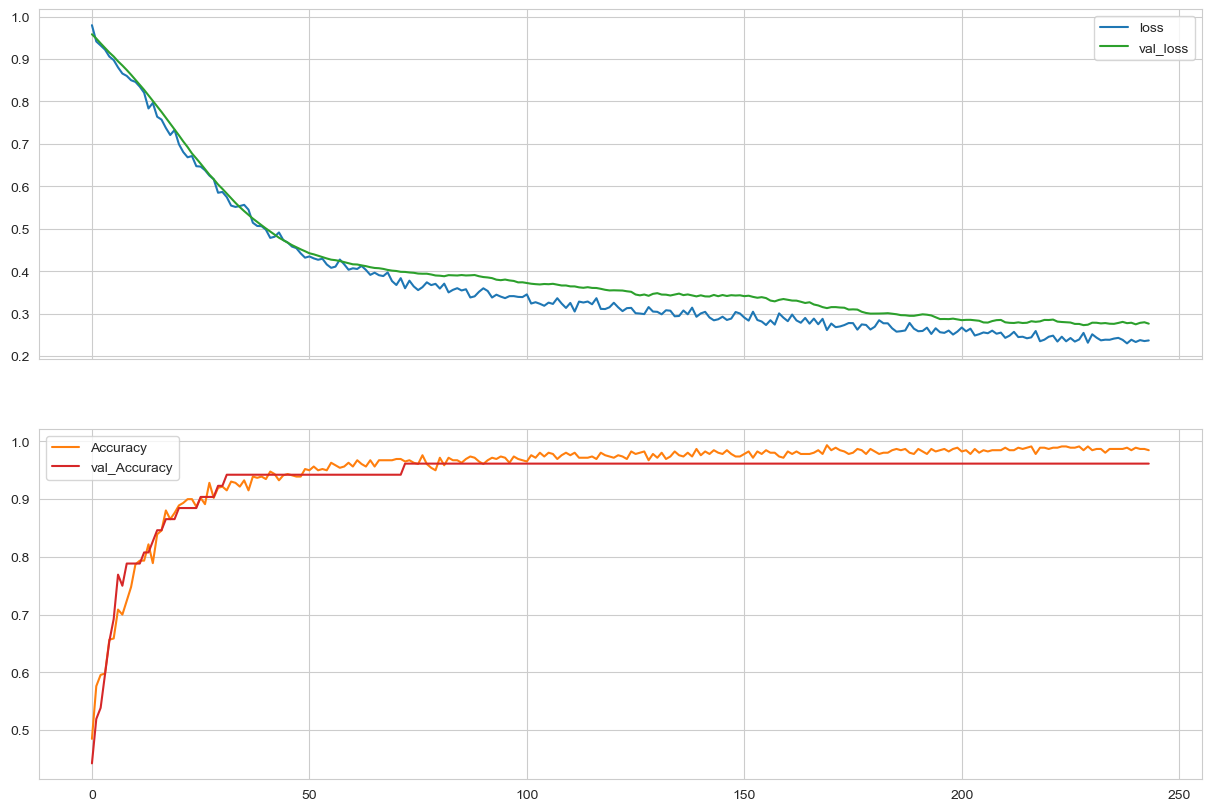

In [114]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [115]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 10ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [116]:
# bizim kurduğum l1l2 model optunanın bize verdğinden daha iyi onunla devam edebiliriz .UNUTMAYALIM :
# optuna bize bir başlangıç noktası verir buradan gelecek hyperparametreler mutlak doğrudur gibi bir yaklaşım olmamalıdır.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

2/2 [==============================] - 0s 5ms/step


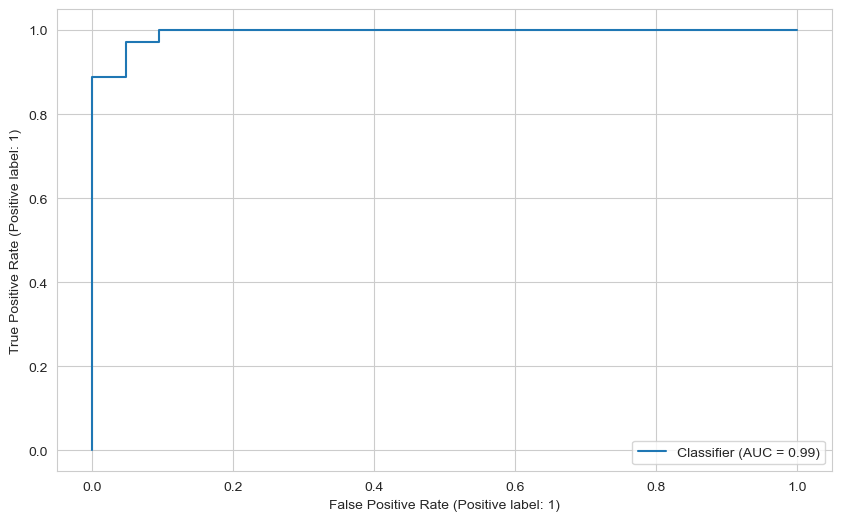

In [117]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [118]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.32950782775878906
accuracy:  0.9473684430122375


In [93]:
roc_auc_score(y_test, y_pred_proba)

0.992063492063492

## Saving Final Model and Scaler

In [119]:
import pickle

pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [95]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 16ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [120]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model_cancer = load_model('model_cancer.h5')
#model_cancer = load_model("l1l2_model.h5")
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [99]:
single_patient = df1.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [100]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[ 1.15125536, -1.49157054,  1.20789474,  2.71756451,  2.24078453,
         2.07067873,  1.83199416,  2.17652702,  3.12076716, -0.27578922,
         0.01210112,  1.51382488,  1.1497669 ,  0.72219885,  1.43414021,
         1.35819431,  1.89535942, -0.93505747,  1.01143791,  2.27537136,
         1.81790011,  1.61621608,  2.58036364,  1.92033751]])

In [101]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 303ms/step


array([[0]])

In [102]:
df["Cancer"].iloc[0]

0

## Comparison with ML

In [103]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.1, random_state=seed)

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___